In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


data=pd.read_csv('ERA5_Weather_Data_Monash.csv')
data

,datetime (UTC),"coordinates (lat,lon)",model (name),model elevation (surface),utc_offset (hrs),temperature (degC),dewpoint_temperature (degC),wind_speed (m/s),mean_sea_level_pressure (Pa),relative_humidity ((0-1)),surface_solar_radiation (W/m^2),surface_thermal_radiation (W/m^2),total_cloud_cover (0-1)
0,2010-01-01 00:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.26,16.39,2.60,101046.38,0.89,287.01,408.35,1.00
1,2010-01-01 01:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.67,16.29,2.91,101037.96,0.86,360.79,411.02,1.00
2,2010-01-01 02:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.16,15.89,3.26,101017.26,0.87,291.54,410.67,1.00
3,2010-01-01 03:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.46,15.33,3.17,101022.56,0.82,357.11,410.95,1.00
4,2010-01-01 04:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.53,15.11,2.95,100940.03,0.80,459.91,410.00,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100052,2021-05-31 20:00:00,"(-37.91, 145.13)",era5,69.59,10.0,8.31,3.28,4.91,102033.73,0.71,0.00,278.11,0.93
100053,2021-05-31 21:00:00,"(-37.91, 145.13)",era5,69.59,10.0,8.15,3.16,4.63,102033.49,0.71,0.00,277.98,1.00
100054,2021-05-31 22:00:00,"(-37.91, 145.13)",era5,69.59,10.0,8.72,3.31,5.29,102069.84,0.69,8.99,281.65,1.00
100055,2021-05-31 23:00:00,"(-37.91, 145.13)",era5,69.59,10.0,9.83,3.88,5.60,102077.12,0.66,80.46,296.20,1.00


In [4]:
data.dtypes

datetime (UTC)                        object
coordinates (lat,lon)                 object
model (name)                          object
model elevation (surface)            float64
utc_offset (hrs)                     float64
temperature (degC)                   float64
dewpoint_temperature (degC)          float64
wind_speed (m/s)                     float64
mean_sea_level_pressure (Pa)         float64
relative_humidity ((0-1))            float64
surface_solar_radiation (W/m^2)      float64
surface_thermal_radiation (W/m^2)    float64
total_cloud_cover (0-1)              float64
dtype: object

In [5]:
data.columns

Index(['datetime (UTC)', 'coordinates (lat,lon)', 'model (name)',
       'model elevation (surface)', 'utc_offset (hrs)', 'temperature (degC)',
       'dewpoint_temperature (degC)', 'wind_speed (m/s)',
       'mean_sea_level_pressure (Pa)', 'relative_humidity ((0-1))',
       'surface_solar_radiation (W/m^2)', 'surface_thermal_radiation (W/m^2)',
       'total_cloud_cover (0-1)'],
      dtype='object')

In [6]:
data.isna().sum()

datetime (UTC)                       0
coordinates (lat,lon)                0
model (name)                         0
model elevation (surface)            0
utc_offset (hrs)                     0
temperature (degC)                   0
dewpoint_temperature (degC)          0
wind_speed (m/s)                     0
mean_sea_level_pressure (Pa)         0
relative_humidity ((0-1))            0
surface_solar_radiation (W/m^2)      0
surface_thermal_radiation (W/m^2)    0
total_cloud_cover (0-1)              0
dtype: int64

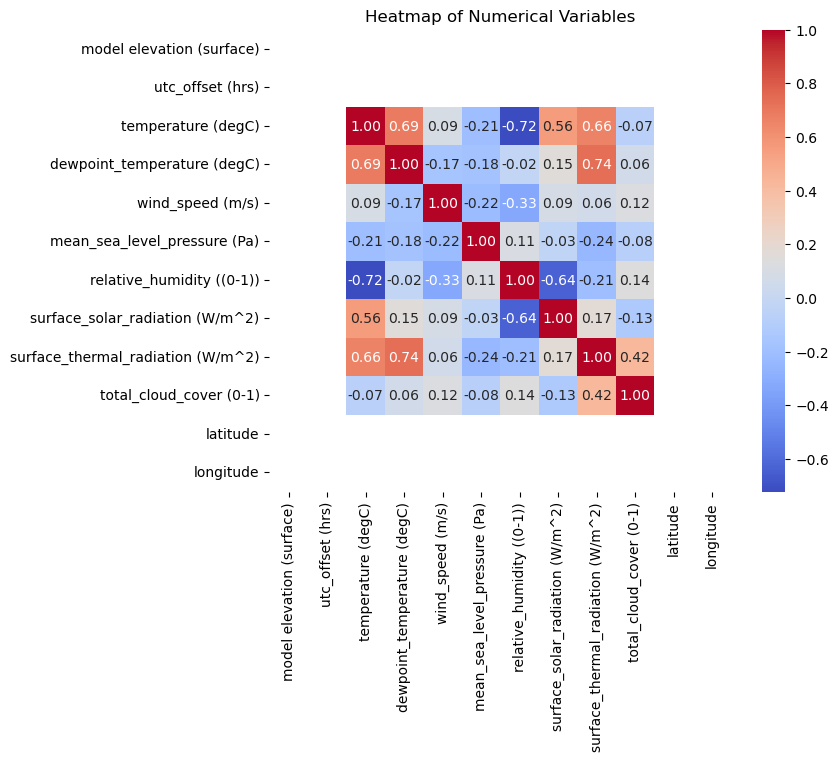

In [7]:
data = pd.read_csv('ERA5_Weather_Data_Monash.csv')

# Convert the 'coordinates (lat,lon)' column into separate latitude and longitude columns
data['latitude'] = data['coordinates (lat,lon)'].apply(lambda x: eval(x)[0])
data['longitude'] = data['coordinates (lat,lon)'].apply(lambda x: eval(x)[1])

# Remove non-numerical columns
numerical_data = data.drop(columns=['datetime (UTC)', 'coordinates (lat,lon)', 'model (name)'])

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Create a heatmap with a smaller figure size
plt.figure(figsize=(8, 6))  # Adjusted to a smaller size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Heatmap of Numerical Variables')
plt.show()

In [8]:
data

,datetime (UTC),"coordinates (lat,lon)",model (name),model elevation (surface),utc_offset (hrs),temperature (degC),dewpoint_temperature (degC),wind_speed (m/s),mean_sea_level_pressure (Pa),relative_humidity ((0-1)),surface_solar_radiation (W/m^2),surface_thermal_radiation (W/m^2),total_cloud_cover (0-1),latitude,longitude
0,2010-01-01 00:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.26,16.39,2.60,101046.38,0.89,287.01,408.35,1.00,-37.91,145.13
1,2010-01-01 01:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.67,16.29,2.91,101037.96,0.86,360.79,411.02,1.00,-37.91,145.13
2,2010-01-01 02:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.16,15.89,3.26,101017.26,0.87,291.54,410.67,1.00,-37.91,145.13
3,2010-01-01 03:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.46,15.33,3.17,101022.56,0.82,357.11,410.95,1.00,-37.91,145.13
4,2010-01-01 04:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.53,15.11,2.95,100940.03,0.80,459.91,410.00,0.90,-37.91,145.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100052,2021-05-31 20:00:00,"(-37.91, 145.13)",era5,69.59,10.0,8.31,3.28,4.91,102033.73,0.71,0.00,278.11,0.93,-37.91,145.13
100053,2021-05-31 21:00:00,"(-37.91, 145.13)",era5,69.59,10.0,8.15,3.16,4.63,102033.49,0.71,0.00,277.98,1.00,-37.91,145.13
100054,2021-05-31 22:00:00,"(-37.91, 145.13)",era5,69.59,10.0,8.72,3.31,5.29,102069.84,0.69,8.99,281.65,1.00,-37.91,145.13
100055,2021-05-31 23:00:00,"(-37.91, 145.13)",era5,69.59,10.0,9.83,3.88,5.60,102077.12,0.66,80.46,296.20,1.00,-37.91,145.13


array([[<AxesSubplot:title={'center':'model elevation (surface)'}>,
        <AxesSubplot:title={'center':'utc_offset (hrs)'}>,
        <AxesSubplot:title={'center':'temperature (degC)'}>],
       [<AxesSubplot:title={'center':'dewpoint_temperature (degC)'}>,
        <AxesSubplot:title={'center':'wind_speed (m/s)'}>,
        <AxesSubplot:title={'center':'mean_sea_level_pressure (Pa)'}>],
       [<AxesSubplot:title={'center':'relative_humidity ((0-1))'}>,
        <AxesSubplot:title={'center':'surface_solar_radiation (W/m^2)'}>,
        <AxesSubplot:title={'center':'surface_thermal_radiation (W/m^2)'}>],
       [<AxesSubplot:title={'center':'total_cloud_cover (0-1)'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>]], dtype=object)

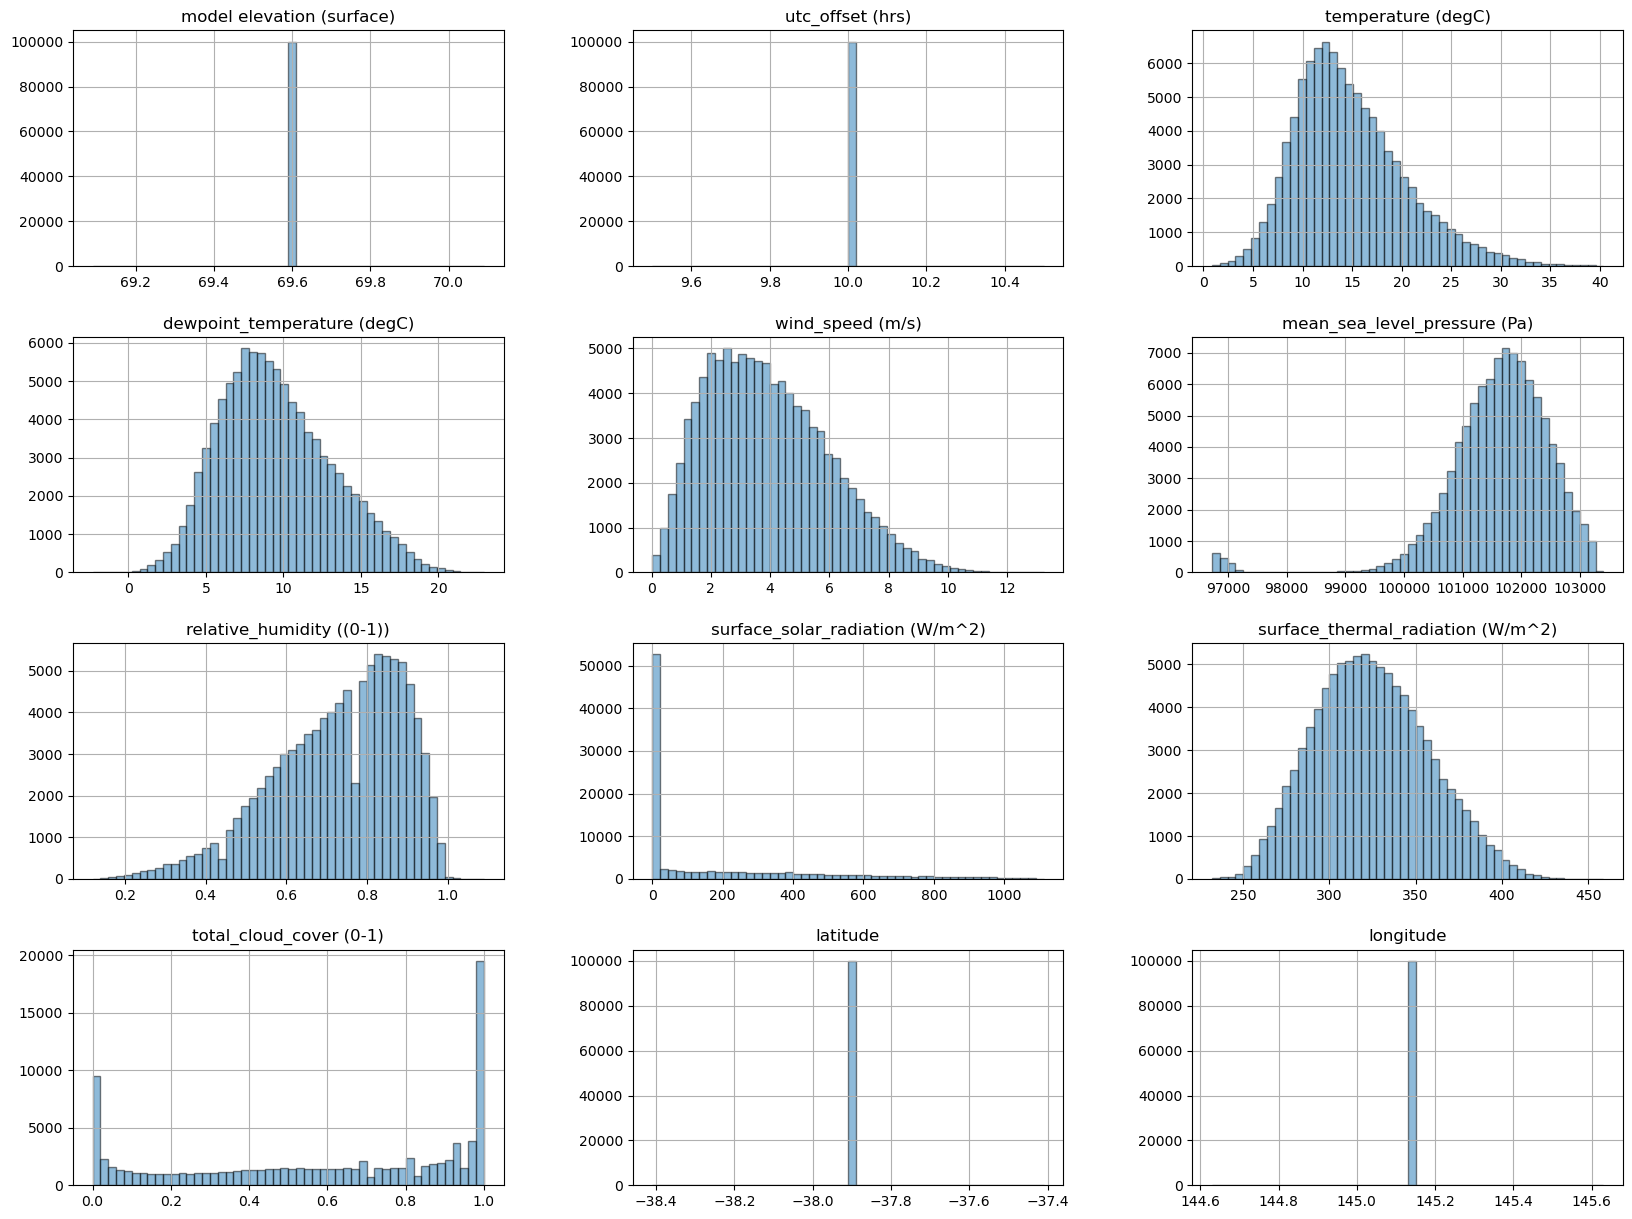

In [9]:
data.hist(alpha=0.5, bins=50,edgecolor='black',figsize=(20,15))
#We have clear outliers for median house value and median housing age, might need to clean that up

What is wrong with surface solar radiation and total cloud cover. 

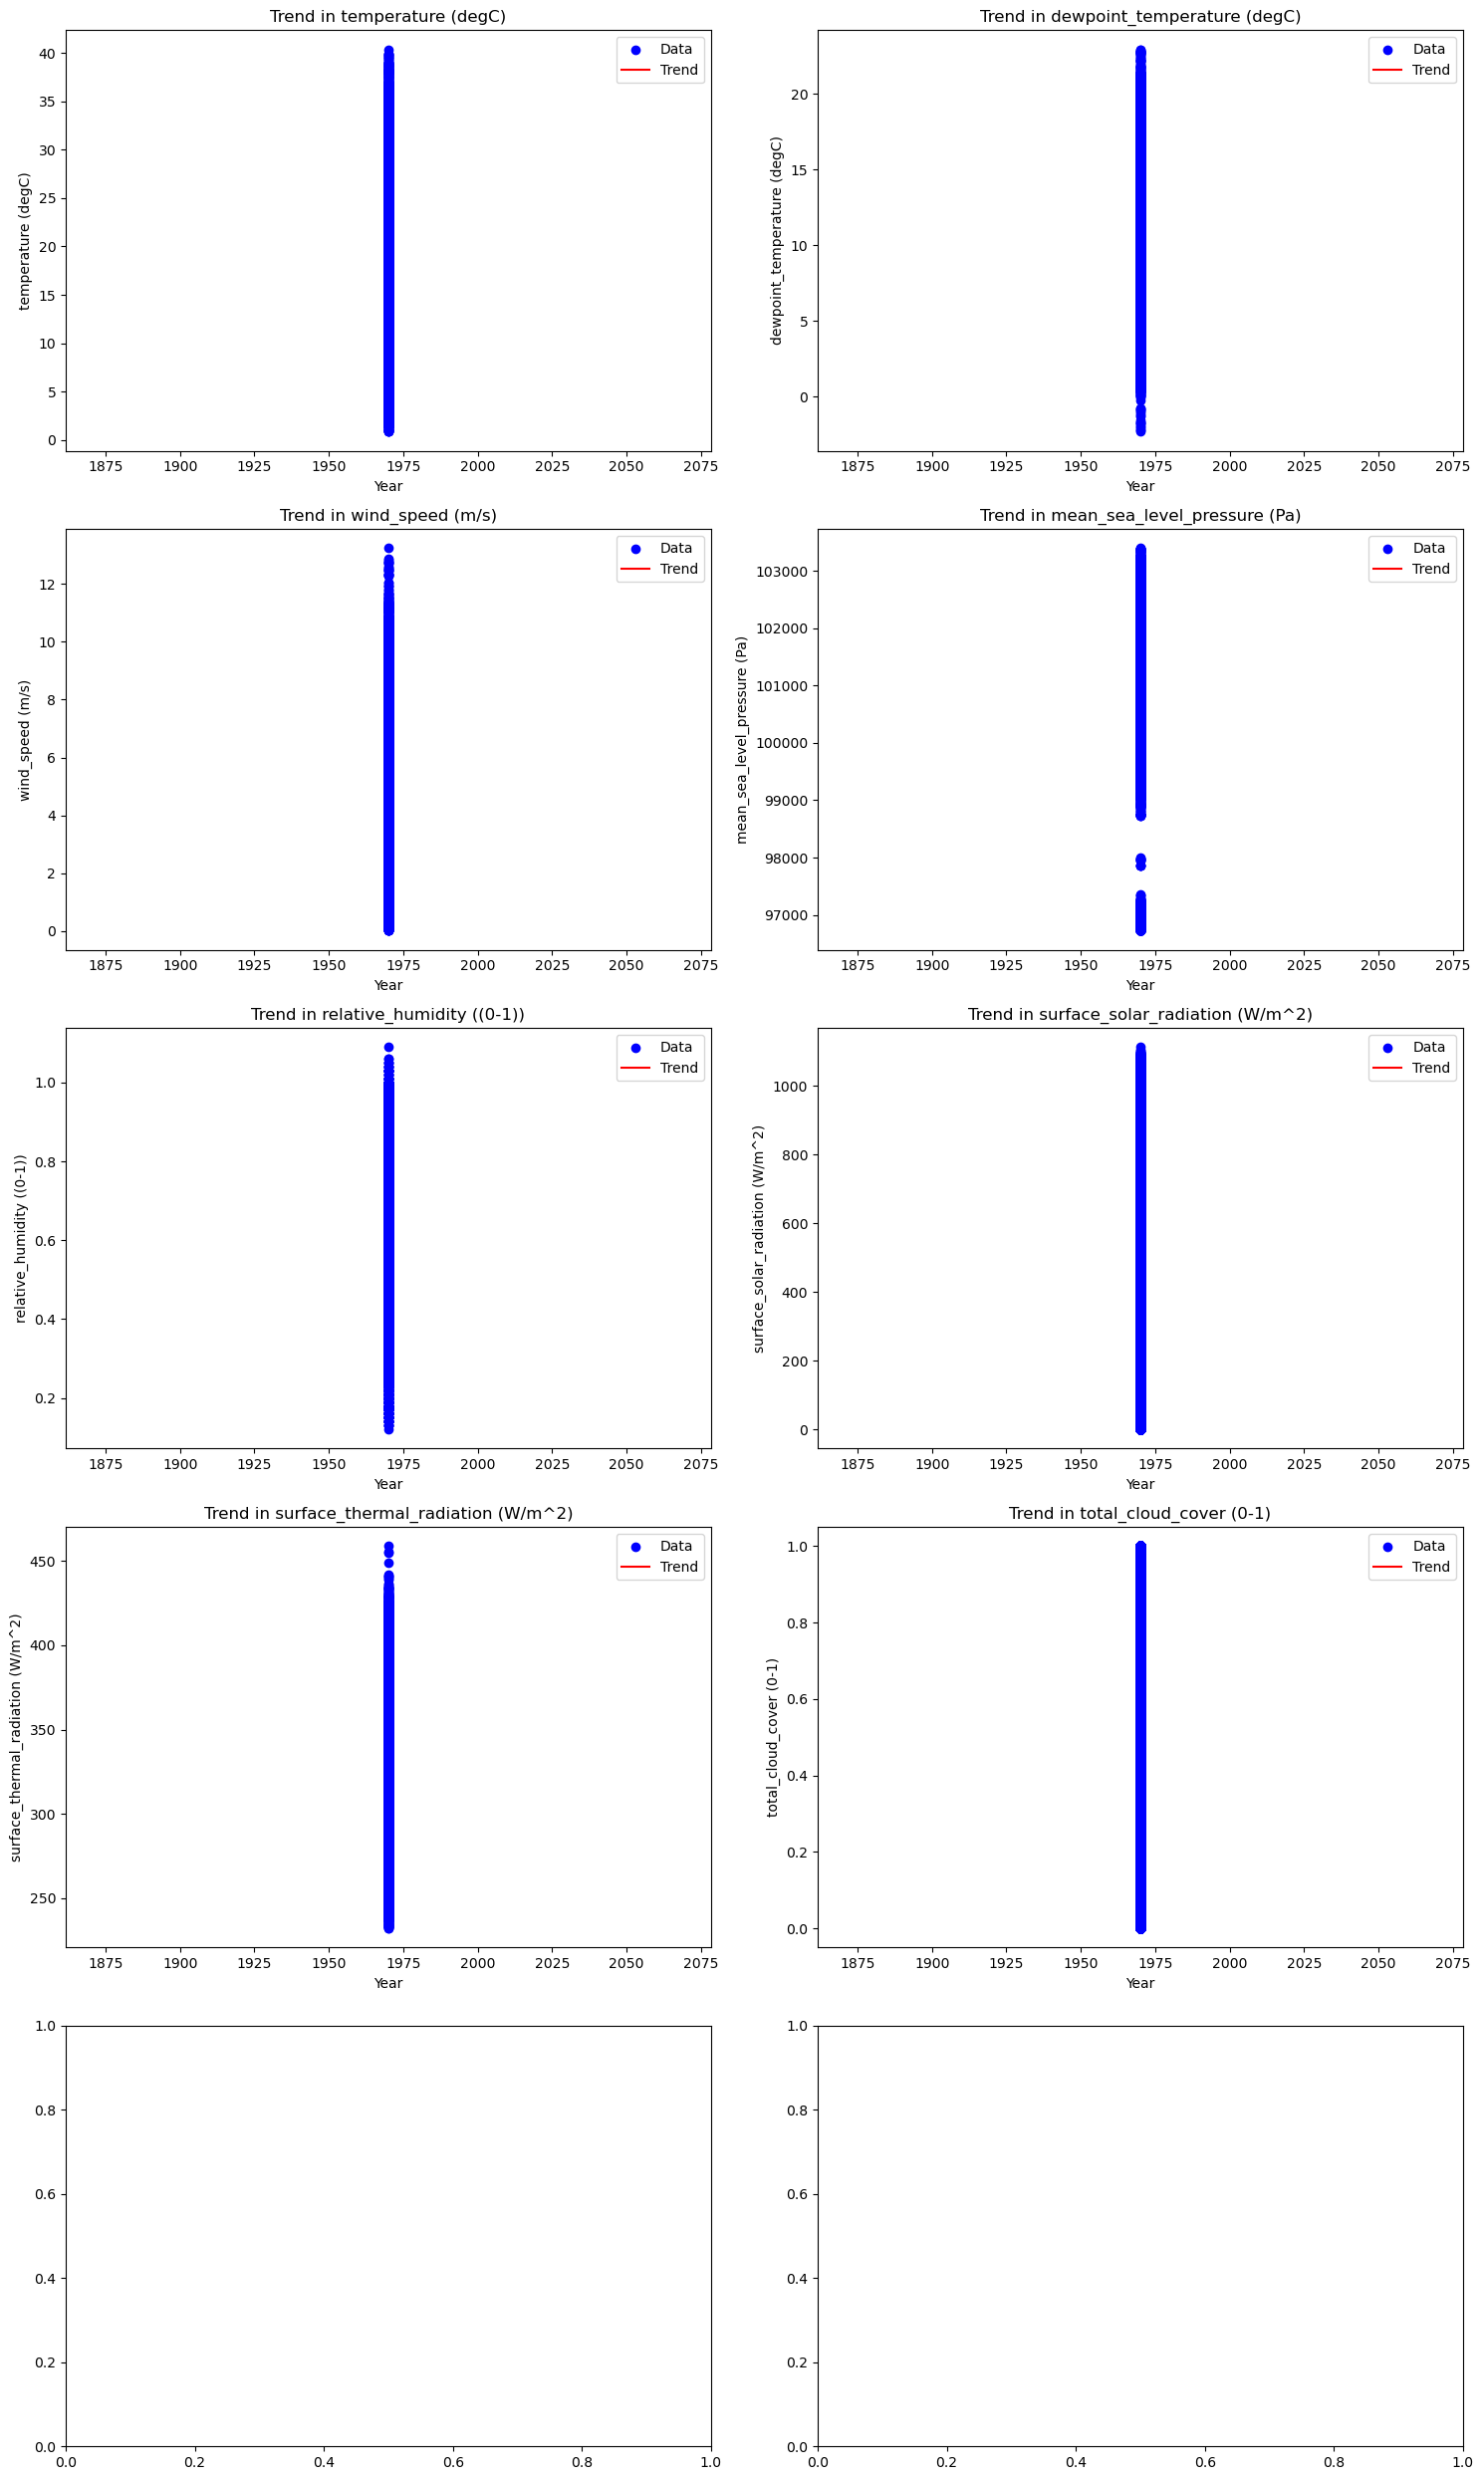

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

data.index = pd.to_datetime(data.index)  # Ensuring the index is in datetime format

# Preparing the regression model and figure for plotting
model = LinearRegression()
fig, axes = plt.subplots(5, 2, figsize=(15, 25))  # Adjust the subplot grid as needed
axes = axes.flatten()  # Flatten the axes array for easier iteration

# List of columns to analyze
columns = ['temperature (degC)', 'dewpoint_temperature (degC)', 'wind_speed (m/s)',
           'mean_sea_level_pressure (Pa)', 'relative_humidity ((0-1))',
           'surface_solar_radiation (W/m^2)', 'surface_thermal_radiation (W/m^2)',
           'total_cloud_cover (0-1)']

# Perform regression analysis for each variable
for i, column in enumerate(columns):
    # Prepare data
    X = data.index.year.values.reshape(-1, 1)  # Year as predictor
    y = data[column].values  # Variable as response

    # Fit model
    model.fit(X, y)
    trend = model.predict(X)  # Predicted trend line

    # Plotting
    axes[i].scatter(X, y, color='blue', label='Data')
    axes[i].plot(X, trend, color='red', label='Trend')
    axes[i].set_title(f'Trend in {column}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(column)
    axes[i].legend()

plt.tight_layout()
plt.show()

What is wrong with surface solar radiation and total cloud cover. 

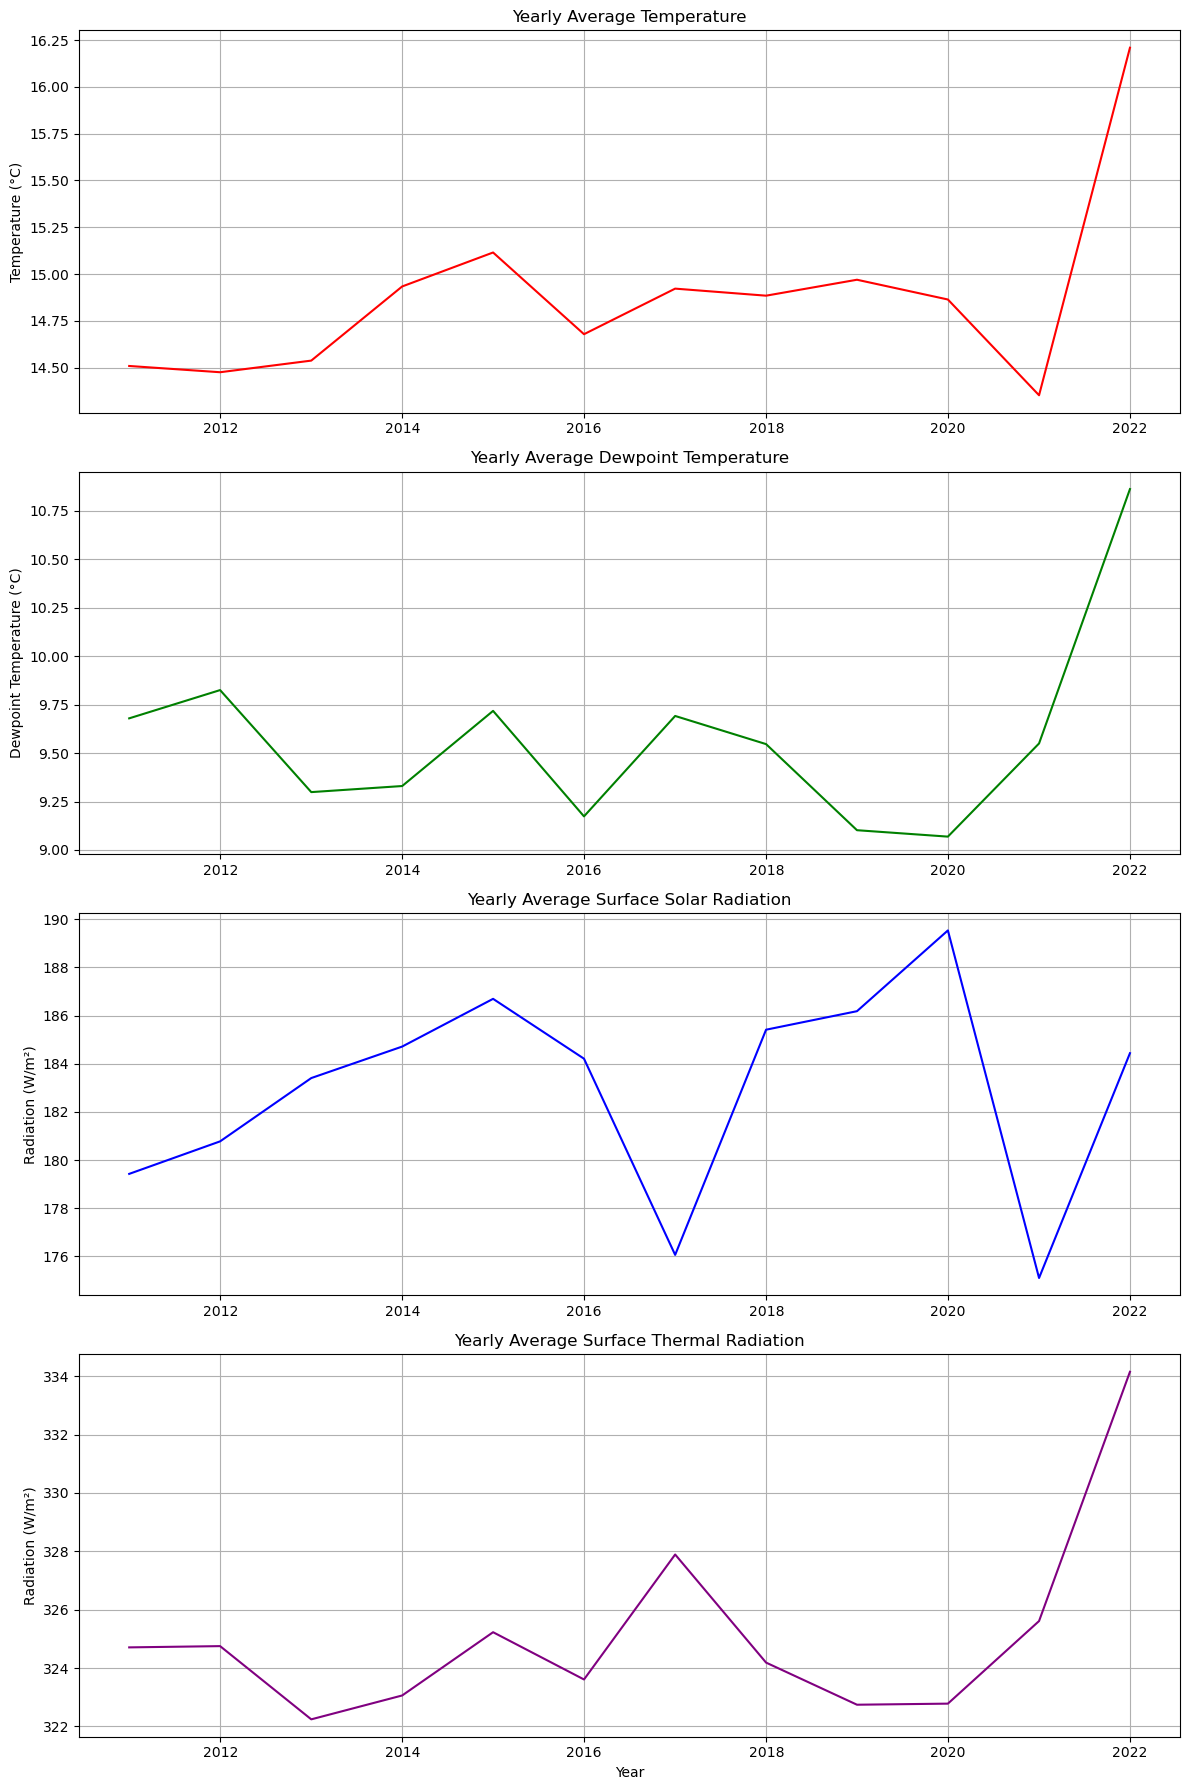

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data into a pandas DataFrame
# Assuming the data is already loaded into `data` DataFrame
data['datetime (UTC)'] = pd.to_datetime(data['datetime (UTC)'])  # Convert the datetime column to datetime objects

# Resample the data annually by first setting 'datetime (UTC)' temporarily as index
annual_data = data.set_index('datetime (UTC)').resample('Y').mean()

# Prepare the figure and subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 18))  # 4 plots, one below the other

# Plot each variable on a separate subplot with yearly smoothed data
axes[0].plot(annual_data.index, annual_data['temperature (degC)'], label='Temperature (°C)', color='red')
axes[0].set_title('Yearly Average Temperature')
axes[0].set_ylabel('Temperature (°C)')
axes[0].grid(True)

axes[1].plot(annual_data.index, annual_data['dewpoint_temperature (degC)'], label='Dewpoint Temperature (°C)', color='green')
axes[1].set_title('Yearly Average Dewpoint Temperature')
axes[1].set_ylabel('Dewpoint Temperature (°C)')
axes[1].grid(True)

axes[2].plot(annual_data.index, annual_data['surface_solar_radiation (W/m^2)'], label='Surface Solar Radiation (W/m²)', color='blue')
axes[2].set_title('Yearly Average Surface Solar Radiation')
axes[2].set_ylabel('Radiation (W/m²)')
axes[2].grid(True)

axes[3].plot(annual_data.index, annual_data['surface_thermal_radiation (W/m^2)'], label='Surface Thermal Radiation (W/m²)', color='purple')
axes[3].set_title('Yearly Average Surface Thermal Radiation')
axes[3].set_ylabel('Radiation (W/m²)')
axes[3].grid(True)

# Setting x-axis label only on the bottom subplot
axes[3].set_xlabel('Year')

# Improve layout and show plot
plt.tight_layout()
plt.show()

In [12]:
MODELLING LINEAR 

SyntaxError: invalid syntax (1992058662.py, line 1)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data 
data['datetime (UTC)'] = pd.to_datetime(data['datetime (UTC)'])
data['year'] = data['datetime (UTC)'].dt.year

# Define features and target variable
features = ['relative_humidity ((0-1))','dewpoint_temperature (degC)', 'surface_solar_radiation (W/m^2)', 'surface_thermal_radiation (W/m^2)', 'year']
target = 'temperature (degC)'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict temperature on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Training Score (R-squared):", train_score)
print("Testing Score (R-squared):", test_score)


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot(np.arange(0, 40), np.arange(0, 40), color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Temperatures')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 5.593819503968581
R-squared Score: 0.8207777035237995


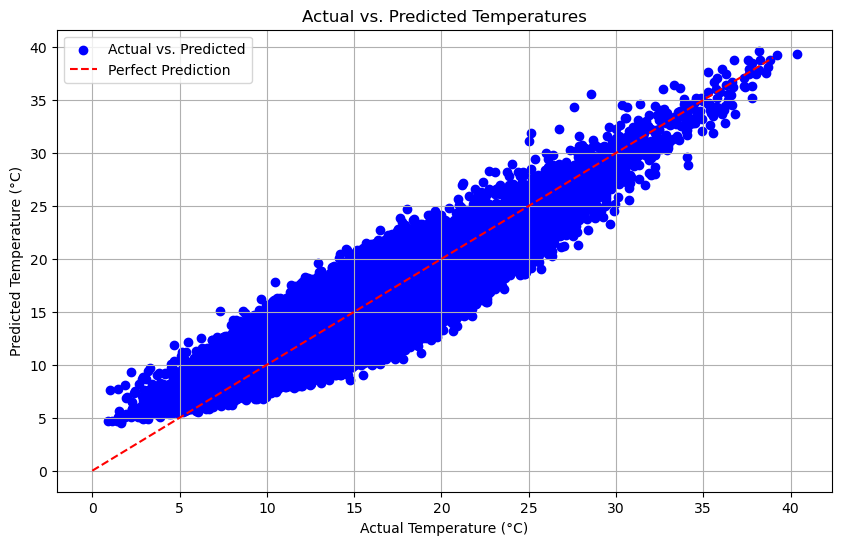

In [16]:

# Convert the datetime column to year
data['datetime (UTC)'] = pd.to_datetime(data['datetime (UTC)'])
data['year'] = data['datetime (UTC)'].dt.year

# Define features and target variable
features = ['relative_humidity ((0-1))','surface_solar_radiation (W/m^2)', 'surface_thermal_radiation (W/m^2)', 'year']
target = 'temperature (degC)'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 2  # Change the degree as needed
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict temperature on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plot actual vs. predicted temperatures
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot(np.arange(0, 40), np.arange(0, 40), color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Temperatures')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from datetime import datetime
from distutils.util import strtobool


# Converts the contents in a .tsf file into a dataframe and returns it along with other meta-data of the dataset: frequency, horizon, whether the dataset contains missing values and whether the series have equal lengths
#
# Parameters
# full_file_path_and_name - complete .tsf file path
# replace_missing_vals_with - a term to indicate the missing values in series in the returning dataframe
# value_column_name - Any name that is preferred to have as the name of the column containing series values in the returning dataframe
def convert_tsf_to_dataframe(
    full_file_path_and_name,
    replace_missing_vals_with="NaN",
    value_column_name="series_value",
):
    col_names = []
    col_types = []
    all_data = {}
    line_count = 0
    frequency = None
    forecast_horizon = None
    contain_missing_values = None
    contain_equal_length = None
    found_data_tag = False
    found_data_section = False
    started_reading_data_section = False

    with open(full_file_path_and_name, "r", encoding="cp1252") as file:
        for line in file:
            # Strip white space from start/end of line
            line = line.strip()

            if line:
                if line.startswith("@"):  # Read meta-data
                    if not line.startswith("@data"):
                        line_content = line.split(" ")
                        if line.startswith("@attribute"):
                            if (
                                len(line_content) != 3
                            ):  # Attributes have both name and type
                                raise Exception("Invalid meta-data specification.")

                            col_names.append(line_content[1])
                            col_types.append(line_content[2])
                        else:
                            if (
                                len(line_content) != 2
                            ):  # Other meta-data have only values
                                raise Exception("Invalid meta-data specification.")

                            if line.startswith("@frequency"):
                                frequency = line_content[1]
                            elif line.startswith("@horizon"):
                                forecast_horizon = int(line_content[1])
                            elif line.startswith("@missing"):
                                contain_missing_values = bool(
                                    strtobool(line_content[1])
                                )
                            elif line.startswith("@equallength"):
                                contain_equal_length = bool(strtobool(line_content[1]))

                    else:
                        if len(col_names) == 0:
                            raise Exception(
                                "Missing attribute section. Attribute section must come before data."
                            )

                        found_data_tag = True
                elif not line.startswith("#"):
                    if len(col_names) == 0:
                        raise Exception(
                            "Missing attribute section. Attribute section must come before data."
                        )
                    elif not found_data_tag:
                        raise Exception("Missing @data tag.")
                    else:
                        if not started_reading_data_section:
                            started_reading_data_section = True
                            found_data_section = True
                            all_series = []

                            for col in col_names:
                                all_data[col] = []

                        full_info = line.split(":")

                        if len(full_info) != (len(col_names) + 1):
                            raise Exception("Missing attributes/values in series.")

                        series = full_info[len(full_info) - 1]
                        series = series.split(",")

                        if len(series) == 0:
                            raise Exception(
                                "A given series should contains a set of comma separated numeric values. At least one numeric value should be there in a series. Missing values should be indicated with ? symbol"
                            )

                        numeric_series = []

                        for val in series:
                            if val == "?":
                                numeric_series.append(replace_missing_vals_with)
                            else:
                                numeric_series.append(float(val))

                        if numeric_series.count(replace_missing_vals_with) == len(
                            numeric_series
                        ):
                            raise Exception(
                                "All series values are missing. A given series should contains a set of comma separated numeric values. At least one numeric value should be there in a series."
                            )

                        all_series.append(pd.Series(numeric_series).array)

                        for i in range(len(col_names)):
                            att_val = None
                            if col_types[i] == "numeric":
                                att_val = int(full_info[i])
                            elif col_types[i] == "string":
                                att_val = str(full_info[i])
                            elif col_types[i] == "date":
                                att_val = datetime.strptime(
                                    full_info[i], "%Y-%m-%d %H-%M-%S"
                                )
                            else:
                                raise Exception(
                                    "Invalid attribute type."
                                )  # Currently, the code supports only numeric, string and date types. Extend this as required.

                            if att_val is None:
                                raise Exception("Invalid attribute value.")
                            else:
                                all_data[col_names[i]].append(att_val)

                line_count = line_count + 1

        if line_count == 0:
            raise Exception("Empty file.")
        if len(col_names) == 0:
            raise Exception("Missing attribute section.")
        if not found_data_section:
            raise Exception("Missing series information under data section.")

        all_data[value_column_name] = all_series
        loaded_data = pd.DataFrame(all_data)

        return (
            loaded_data,
            frequency,
            forecast_horizon,
            contain_missing_values,
            contain_equal_length,
        )


# Example of usage
# loaded_data, frequency, forecast_horizon, contain_missing_values, contain_equal_length = convert_tsf_to_dataframe("TSForecasting/tsf_data/sample.tsf")

# print(loaded_data)
# print(frequency)
# print(forecast_horizon)
# print(contain_missing_values)
# print(contain_equal_length)


train_data = convert_tsf_to_dataframe('phase_1_data.tsf')

test_data = convert_tsf_to_dataframe('nov_data.tsf')
test_data

In [29]:
import pandas

pd.DataFrame(train_data)

C:\Users\bathe\anaconda3\lib\site-packages\pandas\core\internals\construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,0
0,series_name start_timestamp \ 0 Bui...
1,15_minutes
2,None
3,True
4,False


In [30]:
type(train_data)

tuple

In [31]:
df = pd.DataFrame(list(train_data)[0])

In [32]:
df.head()

,series_name,start_timestamp,series_value
0,Building0,2016-07-03 21:30:00,"[283.8, 283.8, 283.8, 606.0, 606.0, 606.0, 606..."
1,Building1,2019-01-09 23:15:00,"[8.1, 15.7, 22.8, 32.7, 8.1, 16.5, 24.7, 34.5,..."
2,Building3,2016-03-01 04:15:00,"[1321.0, 1321.0, 1321.0, 1321.0, 1293.0, 1293...."
3,Building4,2019-07-03 04:45:00,"[2.0, NaN, 1.0, 2.0, NaN, 2.0, NaN, NaN, 2.0, ..."
4,Building5,2019-07-25 23:00:00,"[30.0, 31.0, 24.0, 34.0, 30.0, 31.0, 26.0, 33...."


In [33]:
df.iloc[7, 2]

<PandasArray>
[  0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,
 ...
  3.51,  4.37,  5.22,  5.94,  6.65,  6.68,  6.71,  8.13,  9.55, 10.12]
Length: 61388, dtype: float64

In [34]:
df.tail(46)

,series_name,start_timestamp,series_value
0,Building0,2016-07-03 21:30:00,"[283.8, 283.8, 283.8, 606.0, 606.0, 606.0, 606..."
1,Building1,2019-01-09 23:15:00,"[8.1, 15.7, 22.8, 32.7, 8.1, 16.5, 24.7, 34.5,..."
2,Building3,2016-03-01 04:15:00,"[1321.0, 1321.0, 1321.0, 1321.0, 1293.0, 1293...."
3,Building4,2019-07-03 04:45:00,"[2.0, NaN, 1.0, 2.0, NaN, 2.0, NaN, NaN, 2.0, ..."
4,Building5,2019-07-25 23:00:00,"[30.0, 31.0, 24.0, 34.0, 30.0, 31.0, 26.0, 33...."
5,Building6,2019-07-25 01:45:00,"[36.8, 34.6, 34.6, 36.2, 36.2, 35.2, 35.2, 35...."
6,Solar0,2020-04-25 14:00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,Solar1,2018-12-31 13:00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,Solar2,2019-06-05 14:00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,Solar3,2019-06-05 14:00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [35]:
len(df.iloc[0,2])

148810

In [36]:
df.iloc[0,1]

Timestamp('2016-07-03 21:30:00')

In [ ]:
# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(data['datetime (UTC)'], data['temperature (degC)'], marker='o', linestyle='-', color='blue')
plt.title('Daily Mean Temperatures')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(rotation=45)  # Rotate the x-axis labels to improve readability
plt.tight_layout()  # Adjust the layout to fit the labels
plt.grid(True)
plt.show()
